## Use me to determine how long to run a simulation

In [1]:
from random import random, seed, randrange
from math import floor, pi
import numpy as np
import os
from time import time
import pandas as pd
from time import time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]
import os

In [3]:
%run -i "gcmc.py"

In [4]:
y = 1
s = 34
n = 2 * 10**5
r = 1

yco = y
P = 20 #[MPa]
P_res = P*10**6 #[Pa]
T = 45 + 273.15 #K
fco, fme = PR_Fugacity( P_res/10**5, T, yco )
fco = fco*10**5
fme = fme*10**5

del_sf = "Nothing"#3.35 #[A]
rho_sf = "Nothing"#0.114 #[A^-3]
W = "Nothing"#5*3.8 #[A] relative to diameter of methane 3.80A
sf = False
mega_verbose = False

s_box = s #[A]
N_max = 50000
Vol = s_box**3
kb = 1.3806*10**(7) #[Pa*A^3/K]
Nco = 0 #floor(fco*Vol/kb/T)
Nme = 0 #floor(fme*Vol/kb/T)
Nc = 0
rc = s_box
beta = 1/T
zz_co = beta*fco
zz_me = beta*fme
delta = 1
pi_move = 0.5

N_moves = 1000
N_equil = 0
N_prod = int( np.round( n/N_moves) )


rhocov,rhomev,Env,Pv,Ncov, Nmev = mc_run(verbose = True)

output = pd.DataFrame()
output['rhocov'] = rhocov
output['rhomev'] = rhomev
output['Env'] = Env
output['Pv'] = Pv
output['Ncov'] = Ncov
output['Nmev'] = Nmev

rep = r

20 	yco:  1.0 N:  333.0 P:  11.78 En:  -653.35 Accept%: 0.423 0.331 0.266
40 	yco:  1.0 N:  389.0 P:  -2.54 En:  -795.8 Accept%: 0.476 0.131 0.119
60 	yco:  1.0 N:  435.0 P:  15.68 En:  -848.36 Accept%: 0.503 0.068 0.062
80 	yco:  1.0 N:  473.0 P:  25.58 En:  -914.99 Accept%: 0.506 0.053 0.045
100 	yco:  1.0 N:  472.0 P:  32.12 En:  -921.53 Accept%: 0.5 0.045 0.046
120 	yco:  1.0 N:  459.0 P:  8.19 En:  -913.04 Accept%: 0.513 0.047 0.049
140 	yco:  1.0 N:  484.0 P:  47.66 En:  -917.96 Accept%: 0.505 0.051 0.048
160 	yco:  1.0 N:  446.0 P:  20.88 En:  -880.33 Accept%: 0.505 0.052 0.057
180 	yco:  1.0 N:  457.0 P:  22.59 En:  -889.79 Accept%: 0.497 0.055 0.053
200 	yco:  1.0 N:  458.0 P:  28.41 En:  -891.16 Accept%: 0.505 0.051 0.052


Text(0, 0.5, 'CH4 Density [part/A^3]')

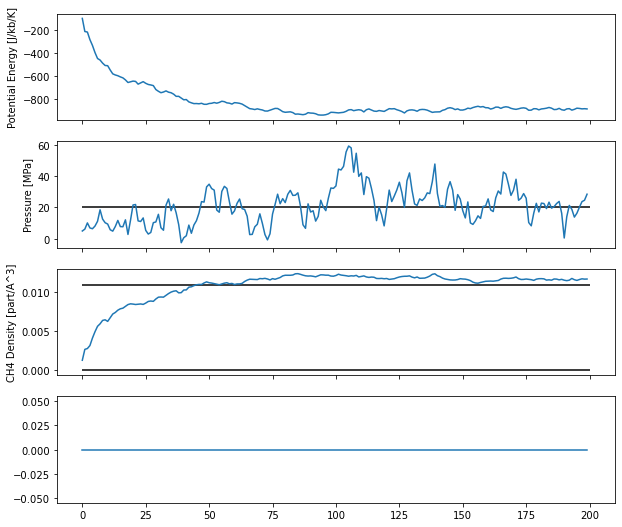

In [5]:
fig, axs = plt.subplots( 4, 1, sharex=True)

axs[0].plot( Env )
axs[0].set_ylabel("Potential Energy [J/kb/K]")

axs[1].plot(Pv)
axs[1].hlines(y=20, xmin=0, xmax = N_prod)
axs[1].set_ylabel("Pressure [MPa]")

axs[2].plot(rhocov)
z = PR_Zmix(200, T, 1)
rho_co = yco*200*10**5/z/kb/T
axs[2].hlines( y = rho_co, xmin = 0, xmax = N_prod)
axs[2].set_ylabel("CO2 Density [part/A^3]")

axs[3].plot(rhomev)
z = PR_Zmix(200, T, 1)
rho_me = (1-yco)*200*10**5/z/kb/T
axs[2].hlines( y = rho_me, xmin = 0, xmax = N_prod)
axs[2].set_ylabel("CH4 Density [part/A^3]")

In [6]:
co2 = pd.read_csv("../c02.txt",delimiter="\t")

In [7]:
co2[co2['Pressure (bar)'] == 200]['Density (mol/l)']*6.02/10000

41    0.011117
Name: Density (mol/l), dtype: float64

In [8]:
rho_co

0.010902685143995563

In [40]:
rho_nist = np.zeros(40)
rho_pr = np.zeros(40)
P = np.linspace( 5,200, 40)

for i in range(40):
    rho_nist[i] =  co2[co2['Pressure (bar)'] == P[i]].iloc[0]['Density (mol/l)']*6.02/10000 
    z = PR_Zmix(P[i], T, 1)
    rho_pr[i] = P[i]*10**5/z/kb/T

Text(0.5, 0, 'Pressure [bar]')

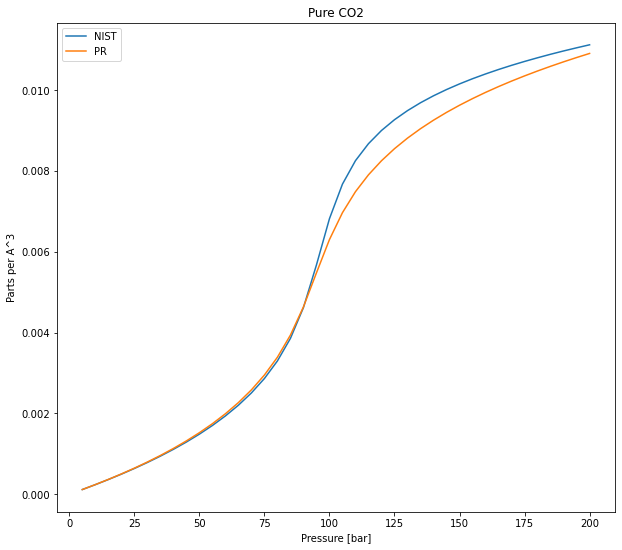

In [41]:
plt.plot( P, rho_nist, label = "NIST" )
plt.plot( P, rho_pr, label = "PR")
plt.legend()
plt.title( "Pure CO2")
plt.ylabel("Parts per A^3")
plt.xlabel("Pressure [bar]")

In [35]:
ch4 = pd.read_csv("../ch4.txt",delimiter="\t")

In [42]:
rho_nist = np.zeros(40)
rho_pr = np.zeros(40)
P = np.linspace( 5,200, 40)

for i in range(40):
    rho_nist[i] =  ch4[ch4['Pressure (bar)'] == P[i]].iloc[0]['Density (mol/l)']*6.02/10000 
    z = PR_Zmix(P[i], T, 0)
    rho_pr[i] = P[i]*10**5/z/kb/T

Text(0.5, 0, 'Pressure [bar]')

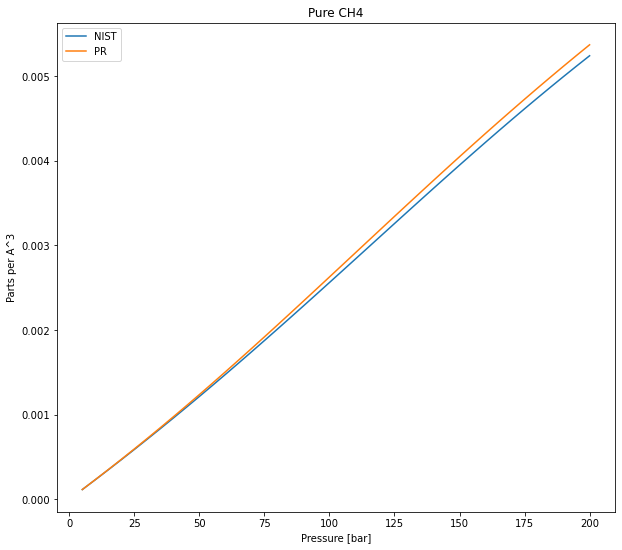

In [43]:
plt.plot( P, rho_nist, label = "NIST" )
plt.plot( P, rho_pr, label = "PR")
plt.legend()
plt.title( "Pure CH4")
plt.ylabel("Parts per A^3")
plt.xlabel("Pressure [bar]")